# **Task 1 - Prediction using Supervised Machine Learning**

*Predicting the **percentage obtained by student on the basis of number of hours studied** using the **linear regression supervised machine learning algorithm**.*


# **Steps:**


*   Importing the Dataset
*   Visualizing the dataset
*   Data Preparation
*   Training the algorithm
*   Visualising the model
*   Making Prediction
*   Evaluating the model

**Author: YASHVEER SINGH**

# 1. Importing the dataset

In [2]:
# Importing the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [9]:
# Reading data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [5]:
# Now Let's observe the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.shape

(25, 2)

In [11]:
# to find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
# Now we will check if our dataset contains null or missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see we do not have any null values in our data set so we can now move on to our next step

# 2. Visualizing the dataset
We will plot the dataset to check whether we can observe any relation between the two variable or not.

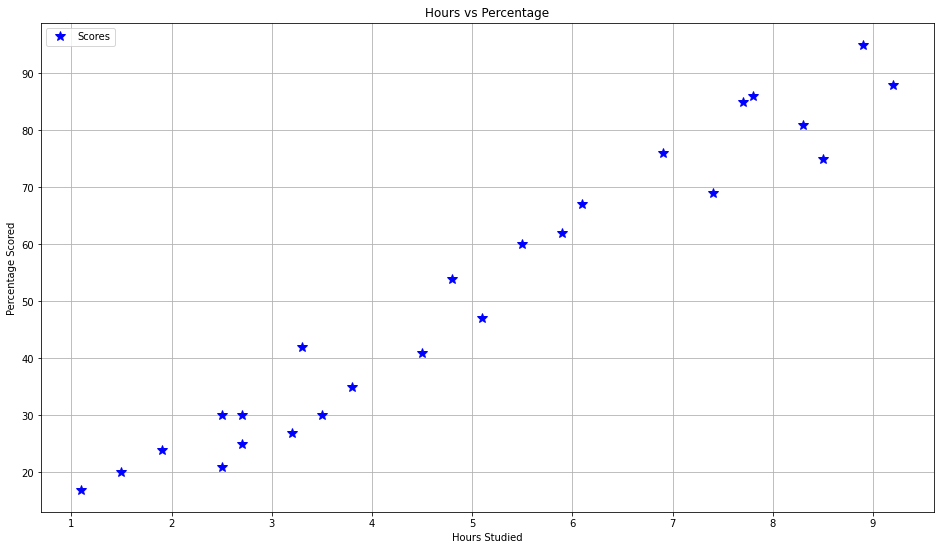

In [38]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours', y='Scores', style='*' , color='blue', markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

**From the graph above, we can observe that there is a linear relationship between "Hours Studied" and "Percentage Scored". So we can use the linear regression supervised machine model on it to predict the further values.**

In [26]:
# We can also use.corr to determine the corelation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# 3. Data Preparation
In this step we will divide the data into "Features"(Inputs) and "Labels"(Output). After that we will splits the whole datasets into 2 parts.
1. Testing Data 
2. Training Data

In [27]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
# Using iloc function we will divide data
X = df.iloc[:,:1].values
Y = df.iloc[:,1:].values

In [29]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [34]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

# 4. Training the Algorithm

We have spilited our data into training and testing sets, and now we will train our model.

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# 5. Visualizing the model
It's time, after training the model, we visualize it.

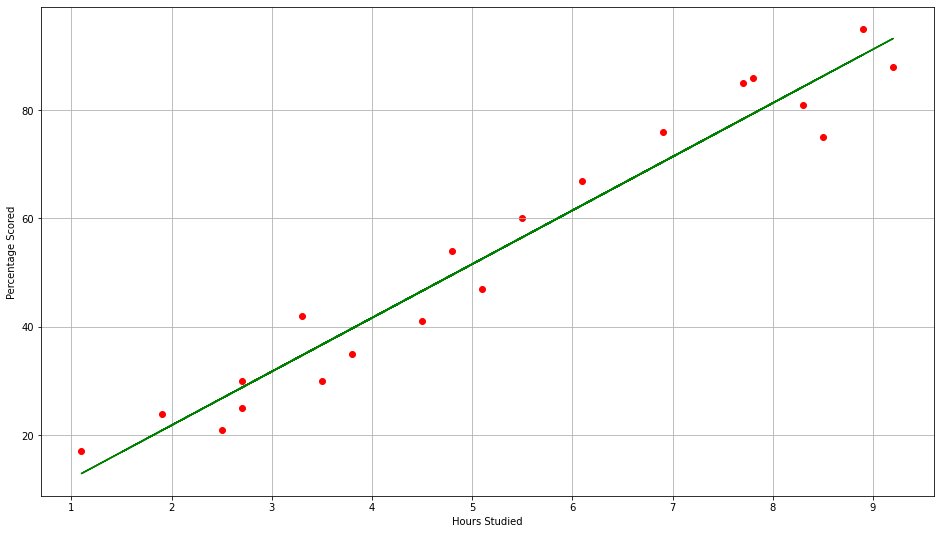

In [40]:
line = model.coef_*X + model.intercept_

# Plotting for the trained data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, Y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

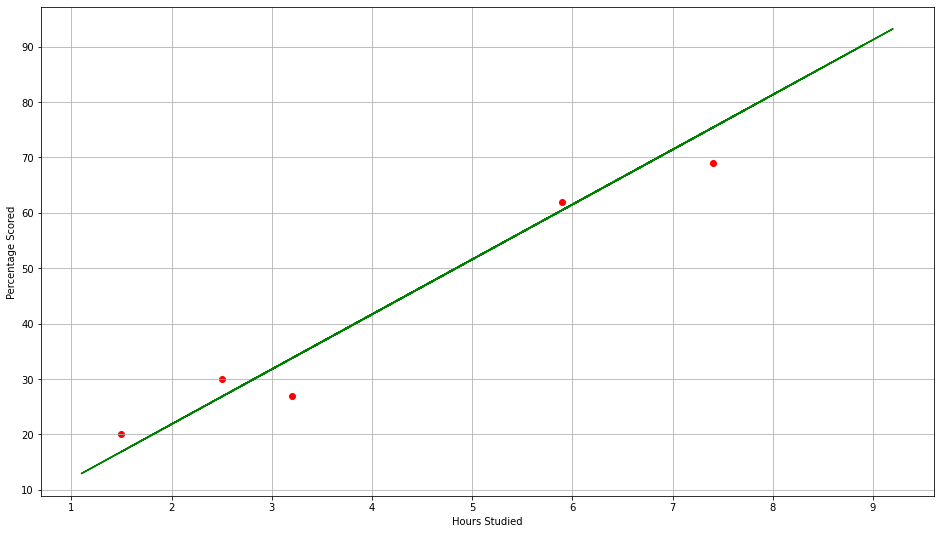

In [41]:
# Plotting for the testing data
# Plotting for the trained data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, Y_test, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

# 6. Making Prediction
Now that we have trained our algorithm, it's time to make some prediction

In [42]:
print(X_test) #Testing Data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
# Comparing Actual vs Predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [44]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [51]:
# Comparing Actual Vs Predicted
comp = pd.DataFrame({ 'Actual':[y_test], 'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [54]:
# Testing with your own data

Hours = 9.25
own_pred = model.predict([[Hours]])
print("The predicted score if a person studies for",Hours,"Hours is", own_pred[0])



The predicted score if a person studies for 9.25 Hours is [93.69173249]


Hence, it can be concluded that the predicted score if a person studies for 9.25 Hours is [**93.69173249**]

# 7. Evaluating the model
In the last step, we are going to evaluate our trained model by calculating mean absolute error.

In [55]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
